Temperatura estimada em t=1.5s: 2.25°C


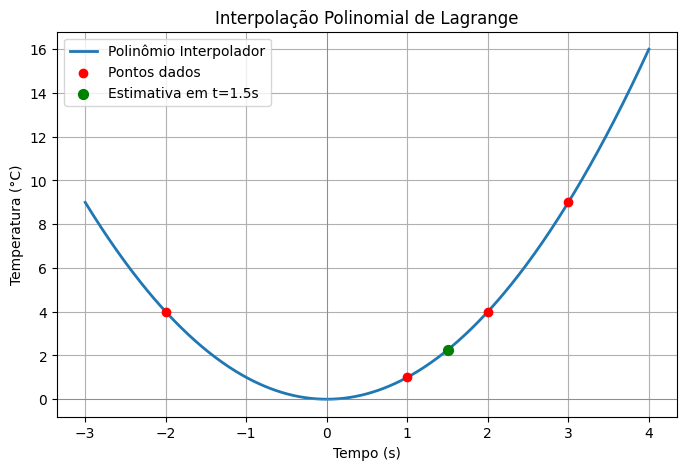

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np

def lagrange_interpolacao(x_pontos, y_pontos, x):
    """
    Calcula o valor do polinômio interpolador de Lagrange no ponto x.
    """
    try:
        x_pts = np.array(x_pontos, dtype=float)
        y_pts = np.array(y_pontos, dtype=float)
    except (ValueError, TypeError) as e:
        raise TypeError("x_pontos e y_pontos devem ser iteráveis de números.") from e

    if x_pts.ndim != 1 or y_pts.ndim != 1:
        raise ValueError("x_pontos e y_pontos devem ser arrays unidimensionais.")

    if len(x_pts) == 0:
        raise ValueError("A lista de pontos não pode estar vazia.")

    if len(x_pts) != len(y_pts):
        raise ValueError("x_pontos e y_pontos devem ter o mesmo número de elementos.")

    if len(np.unique(x_pts)) != len(x_pts):
        raise ValueError("Todos os valores em x_pontos devem ser distintos.")
    n = len(x_pts)
    resultado = 0.0
    for j in range(n):
        termo = y_pts[j]
        for m in range(n):
            if m != j:
                termo *= (x - x_pts[m]) / (x_pts[j] - x_pts[m])
        resultado += termo
    return resultado

x_vals = [1, 2, -2, 3]
y_vals = [1, 4, 4, 9]
t_est = 1.5 # Ponto especifico de teste

try:
    temp_15 = lagrange_interpolacao(x_vals, y_vals, t_est)

except ValueError as e:
    print(f"Erro: {e}")
except Exception as e:
    print(f"Erro inesperado: {e}")
else:
    print(f"Temperatura estimada em t={t_est}s: {temp_15:.2f}°C")
    x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
    y_plot = [lagrange_interpolacao(x_vals, y_vals, x) for x in x_plot]

    plt.figure(figsize=(8, 5))
    plt.plot(x_plot, y_plot, label='Polinômio Interpolador', linewidth=2)
    plt.scatter(x_vals, y_vals, color='red', label='Pontos dados', zorder=5)

    plt.scatter(t_est, temp_15, color='green', s=50, label=f'Estimativa em t={t_est}s', zorder=6)
    plt.title('Interpolação Polinomial de Lagrange')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Temperatura (°C)')
    plt.grid(True)
    plt.legend()
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.show()


### Explicação do Polinômio de Lagrange

A Interpolação de Lagrange é um método numérico utilizado para estimar valores de uma função com base em um conjunto de pontos conhecidos. O objetivo é construir um polinômio que passe exatamente por todos os pontos dados, permitindo prever valores entre eles (ou até fora deles, com menos precisão).

Esse método é especialmente útil quando temos um número pequeno de dados e precisamos de uma aproximação suave entre os pontos.

A fórmula geral do polinômio de Lagrange é:

**P(x) = Σ [ y_j * L_j(x) ]**,  
onde **L_j(x)** é o polinômio base de Lagrange definido como:

**L_j(x) = Π (x - x_m) / (x_j - x_m)**, para todos m ≠ j

No código, essa lógica é implementada em forma de laços `for`, onde cada termo é construído multiplicando as diferenças `(x - x_m) / (x_j - x_m)`, e depois somado ao resultado final.

---

**Vantagens da Interpolação de Lagrange:**

1. Não requer solução de sistemas lineares  
2. Método direto: constrói o polinômio explicitamente  
3. Ideal para poucos pontos com alta precisão  
4. Fácil de entender e implementar com listas ou arrays  

---

**Desvantagens da Interpolação de Lagrange:**

1. Instável para grande número de pontos (efeito de Runge)  
2. Custo computacional cresce com o número de pontos  
3. Não é prático para atualizar com novos pontos (precisa recalcular tudo)  
4. Fora da faixa dos dados (extrapolação), o erro pode crescer muito  

---

OBS: PARTES ALTERAVEIS DO CODIGO:

Para esse codigo básicamente só se pode alterar os valores de x e de y, bem como um ponto de teste expecifico, como está destacado a baixo.

x_vals = [1, 2, -2, 3]

y_vals = [1, 4, 4, 9]

t_est = 15 # Ponto especifico de teste